High p-value example:
t-statistic: -1.708
p-value: 0.094

Medium p-value example:
t-statistic: 1.761
p-value: 0.084

Low p-value example:
t-statistic: 2.512
p-value: 0.015


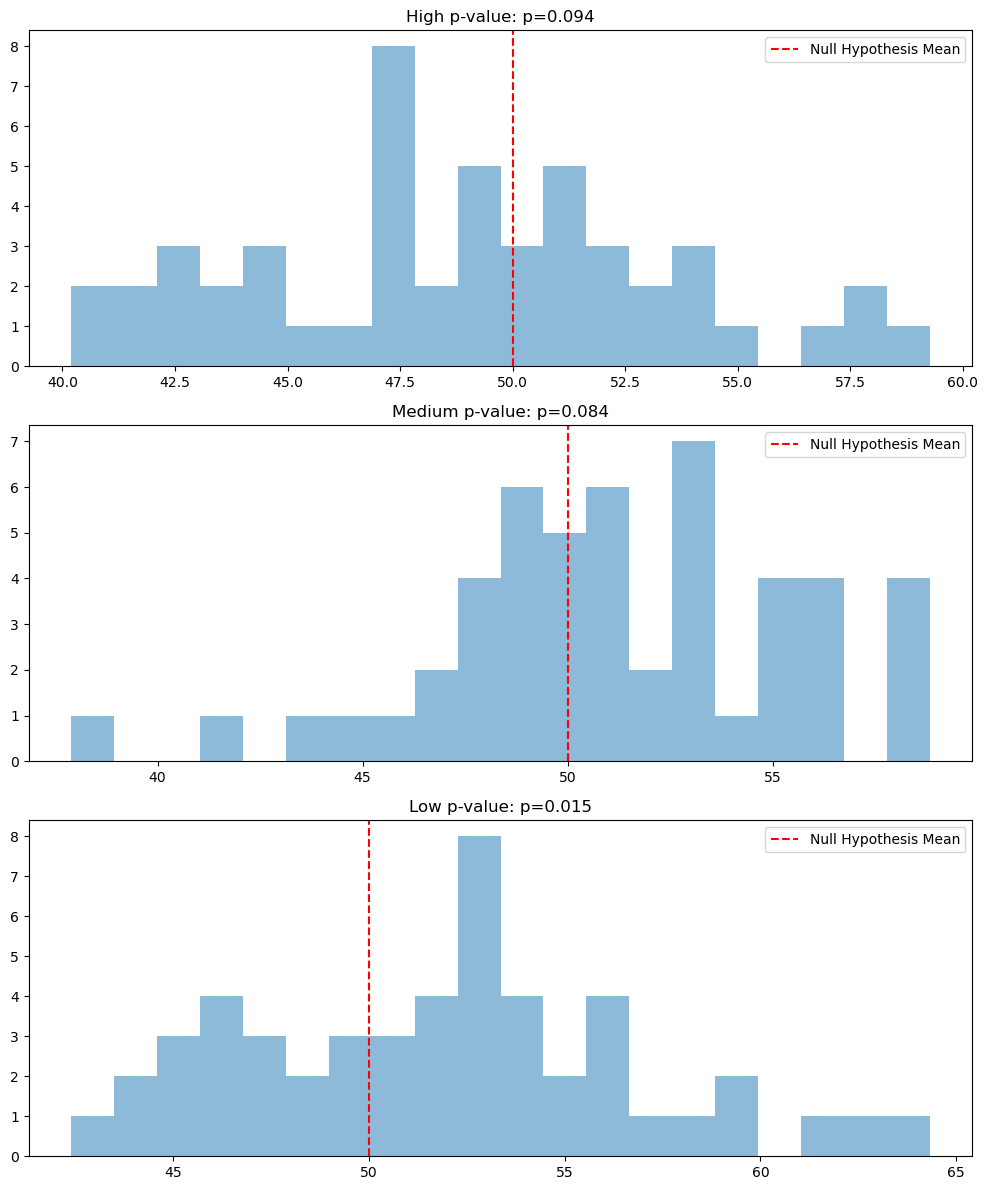

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulate data with different p-values
np.random.seed(42)

# High p-value (fail to reject null hypothesis)
sample_data_high_pvalue = np.random.normal(50, 5, 50)
t_stat_high, p_value_high = stats.ttest_1samp(sample_data_high_pvalue, 50)
print(f"High p-value example:")
print(f"t-statistic: {t_stat_high:.3f}")
print(f"p-value: {p_value_high:.3f}")

# Medium p-value (borderline significance)
sample_data_medium_pvalue = np.random.normal(51, 5, 50)
t_stat_medium, p_value_medium = stats.ttest_1samp(sample_data_medium_pvalue, 50)
print(f"\nMedium p-value example:")
print(f"t-statistic: {t_stat_medium:.3f}")
print(f"p-value: {p_value_medium:.3f}")

# Low p-value (reject null hypothesis)
sample_data_low_pvalue = np.random.normal(52, 5, 50)
t_stat_low, p_value_low = stats.ttest_1samp(sample_data_low_pvalue, 50)
print(f"\nLow p-value example:")
print(f"t-statistic: {t_stat_low:.3f}")
print(f"p-value: {p_value_low:.3f}")

# Visualize the distributions
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# High p-value
ax[0].hist(sample_data_high_pvalue, bins=20, alpha=0.5)
ax[0].axvline(50, color='r', linestyle='--', label='Null Hypothesis Mean')
ax[0].set_title(f"High p-value: p={p_value_high:.3f}")
ax[0].legend()

# Medium p-value
ax[1].hist(sample_data_medium_pvalue, bins=20, alpha=0.5)
ax[1].axvline(50, color='r', linestyle='--', label='Null Hypothesis Mean')
ax[1].set_title(f"Medium p-value: p={p_value_medium:.3f}")
ax[1].legend()

# Low p-value
ax[2].hist(sample_data_low_pvalue, bins=20, alpha=0.5)
ax[2].axvline(50, color='r', linestyle='--', label='Null Hypothesis Mean')
ax[2].set_title(f"Low p-value: p={p_value_low:.3f}")
ax[2].legend()

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. T-Test (One-Sided and Two-Sided)
# Simulate data for one-sided t-test
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
city = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
gender = ['Male', 'Female']

# Simulate sample data with a mean of 55 and standard deviation of 5
# The null hypothesis is that the mean is less than or equal to 54
# The alternative hypothesis is that the mean is greater than 54
sample_data = np.random.normal(55, 5, len(dates))
df_one_sided = pd.DataFrame({'Date': dates, 'City': np.random.choice(city, len(dates)), 'Gender': np.random.choice(gender, len(dates)), 'Value': sample_data})

# Perform one-sided t-test
t_stat, p_value = stats.ttest_1samp(df_one_sided['Value'], 54)
print(f"One-Sided T-Test:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value/2:.3f}") # One-sided p-value

# Simulate data for two-sided t-test
# The null hypothesis is that the mean is equal to 54
# The alternative hypothesis is that the mean is not equal to 54
sample_data = np.random.normal(54, 5, len(dates))
df_two_sided = pd.DataFrame({'Date': dates, 'City': np.random.choice(city, len(dates)), 'Gender': np.random.choice(gender, len(dates)), 'Value': sample_data})

# Perform two-sided t-test
t_stat, p_value = stats.ttest_1samp(df_two_sided['Value'], 54)
print(f"\nTwo-Sided T-Test:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}") # Two-sided p-value

# 2. Chi-Square Test
# Simulate data for chi-square test
# The null hypothesis is that the distribution of the categories is uniform
# The alternative hypothesis is that the distribution of the categories is not uniform
observed = [20, 30, 25, 15]
df_chi2 = pd.DataFrame({'Category': ['A', 'B', 'C', 'D'], 'Observed': observed})

chi2_stat, p_value, dof, expected = stats.chi2_contingency(df_chi2['Observed'])
print(f"\nChi-Square Test:")
print(f"Chi-Square statistic: {chi2_stat:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# 3. Z-Test
# Simulate data for z-test
# The null hypothesis is that the mean is equal to 54
# The alternative hypothesis is that the mean is not equal to 54
np.random.seed(42)
sample_mean = 55.2
sample_std = 4.8
sample_size = 50
z_stat, p_value = stats.zscore(sample_mean, popmean=54, std=sample_std/np.sqrt(sample_size))
print(f"\nZ-Test:")
print(f"Z-statistic: {z_stat:.3f}")
print(f"p-value: {p_value*2:.3f}") # Two-sided p-value

# 4. ANOVA (One-Way, Two-Way, and Repeated Measures)
# One-Way ANOVA
# The null hypothesis is that all group means are equal
# The alternative hypothesis is that at least one group mean is different
np.random.seed(42)
treatment_A = np.random.normal(10, 1, 10)
treatment_B = np.random.normal(12, 1, 10)
treatment_C = np.random.normal(11, 1, 10)
df_one_way = pd.DataFrame({'Treatment': ['A']*10 + ['B']*10 + ['C']*10, 'Response': np.concatenate((treatment_A, treatment_B, treatment_C))})
model = ols("Response ~ C(Treatment)", data=df_one_way).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"\nOne-Way ANOVA:")
print(anova_table)

# Two-Way ANOVA
# The null hypothesis is that all group means are equal
# The alternative hypothesis is that at least one group mean is different
np.random.seed(42)
factor1_A = np.random.normal(10, 1, 5)
factor1_B = np.random.normal(12, 1, 5)
factor2_X = np.random.normal(11, 1, 5)
factor2_Y = np.random.normal(13, 1, 5)
df_two_way = pd.DataFrame({'Factor1': ['A']*5 + ['B']*5, 'Factor2': ['X']*5 + ['Y']*5, 'Response': np.concatenate((factor1_A, factor1_B, factor2_X, factor2_Y))})
model = ols("Response ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)", data=df_two_way).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"\nTwo-Way ANOVA:")
print(anova_table)

# Repeated Measures ANOVA
# The null hypothesis is that all group means are equal
# The alternative hypothesis is that at least one group mean is different
np.random.seed(42)
subject_1_A = np.random.normal(10, 1, 2)
subject_1_B = np.random.normal(12, 1, 2)
subject_2_A = np.random.normal(11, 1, 2)
subject_2_B = np.random.normal(13, 1, 2)
subject_3_A = np.random.normal(9, 1, 2)
subject_3_B = np.random.normal(11, 1, 2)
df_repeated = pd.DataFrame({'Subject': [1, 1, 2, 2, 3, 3], 'Treatment': ['A', 'B', 'A', 'B', 'A', 'B'], 'Response': np.concatenate((subject_1_A, subject_1_B, subject_2_A, subject_2_B, subject_3_A, subject_3_B))})
model = ols("Response ~ C(Treatment) + C(Subject)", data=df_repeated).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"\nRepeated Measures ANOVA:")
print(anova_table)

One-Sided T-Test:
t-statistic: 4.231
p-value: 0.000

Two-Sided T-Test:
t-statistic: 2.094
p-value: 0.037

Chi-Square Test:
Chi-Square statistic: 0.000
p-value: 1.000
Degrees of freedom: 0
Expected frequencies:
[20. 30. 25. 15.]


TypeError: zscore() got an unexpected keyword argument 'popmean'